In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing: /content/drive/My Drive/CS543/Project/test_images/solidWhiteCurve.jpg


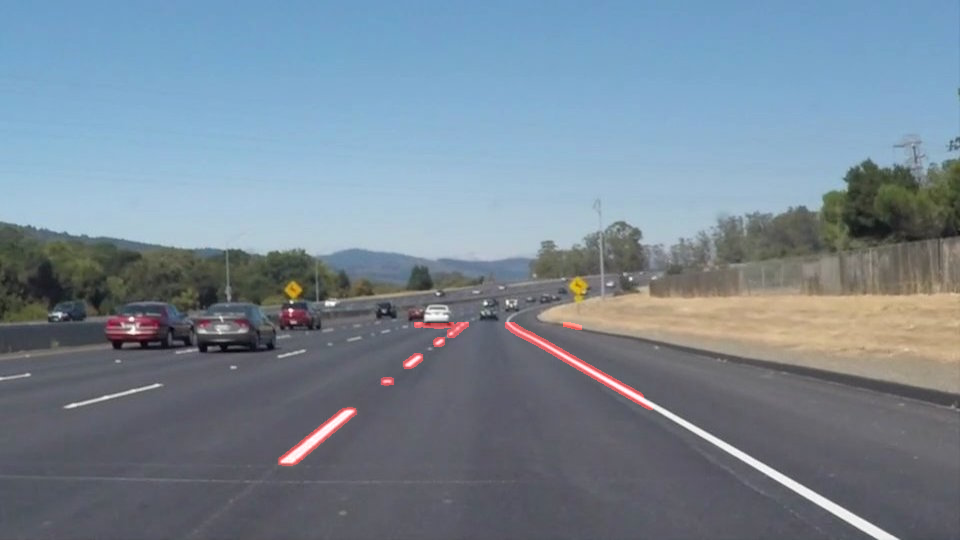

Time taken: 0.46419405937194824 seconds
Processing: /content/drive/My Drive/CS543/Project/test_images/solidYellowCurve2.jpg


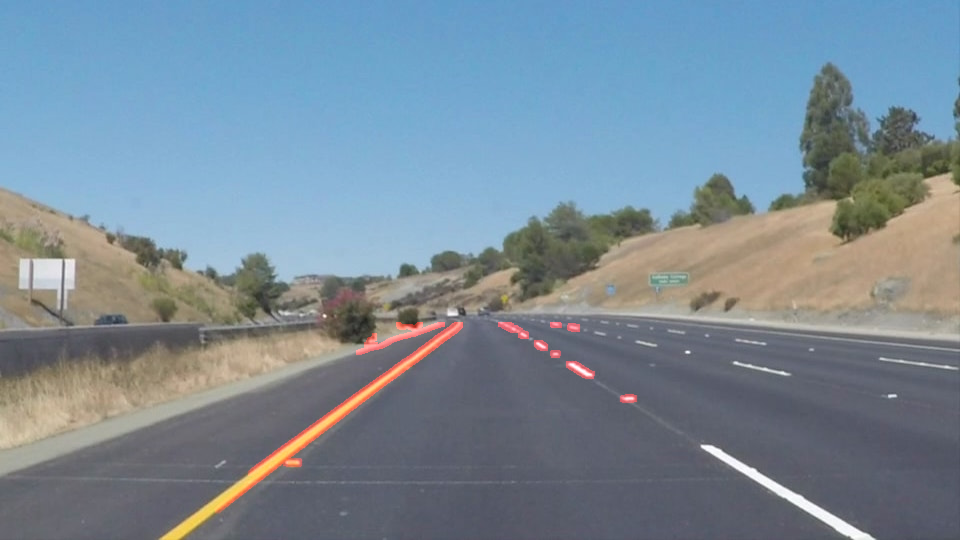

Time taken: 0.418198823928833 seconds
Processing: /content/drive/My Drive/CS543/Project/test_images/solidYellowLeft.jpg


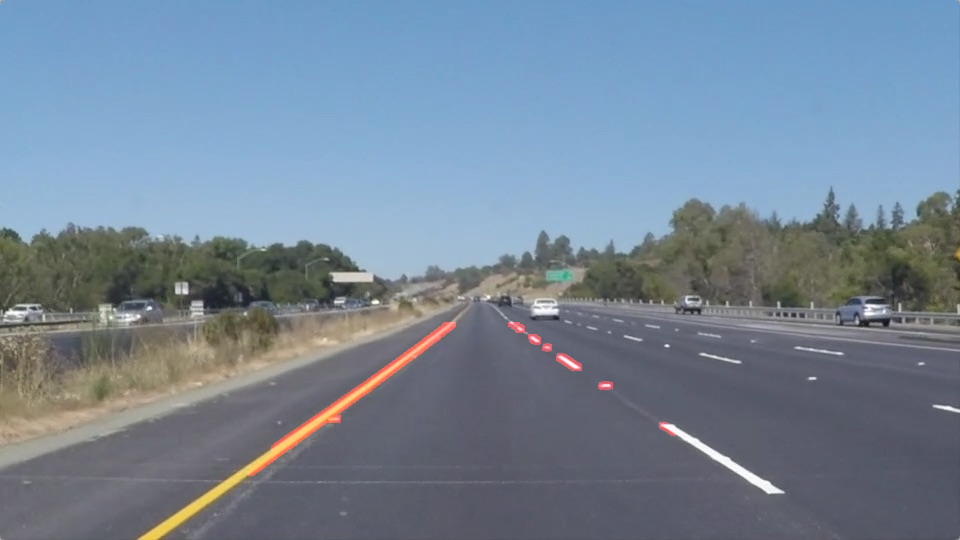

Time taken: 0.39091038703918457 seconds
Processing: /content/drive/My Drive/CS543/Project/test_images/whiteCarLaneSwitch.jpg


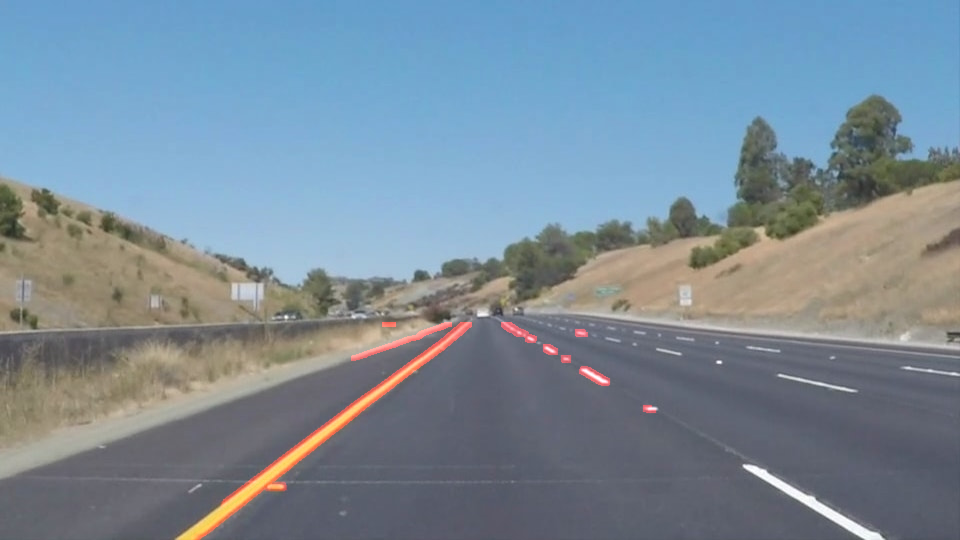

Time taken: 0.4212758541107178 seconds
Processing: /content/drive/My Drive/CS543/Project/test_images/rain.jpg


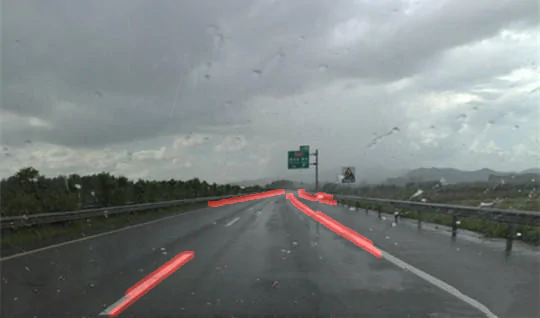

Time taken: 0.05971240997314453 seconds
Processing: /content/drive/My Drive/CS543/Project/test_images/snow.jpg


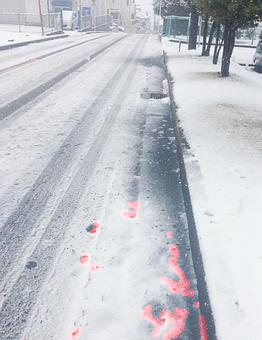

Time taken: 0.041292667388916016 seconds


In [ ]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow
import time

image_folder = '/content/drive/My Drive/CS543/Project/test_images'
image_paths = glob.glob(f'{image_folder}/*.jpg')

for image_path in image_paths:
    start_time = time.time()
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)

    height, width = edges.shape
    polygon = np.array([[
        (width * 0.2, height),
        (width * 0.4, height * 0.6),
        (width * 0.6, height * 0.6),
        (width * 0.8, height),
    ]], dtype=np.int32)
    mask = np.zeros_like(edges)
    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(edges, mask)

    src_points = np.float32([
        [width * 0.4, height * 0.6],
        [width * 0.6, height * 0.6],
        [width * 0.2, height],
        [width * 0.8, height]
    ])
    dst_points = np.float32([
        [width * 0.2, 0],
        [width * 0.8, 0],
        [width * 0.2, height],
        [width * 0.8, height]
    ])
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    warped = cv2.warpPerspective(roi, M, (width, height))

    Minv = cv2.getPerspectiveTransform(dst_points, src_points)
    lane_warped = cv2.warpPerspective(warped, Minv, (width, height))

    kernel = np.ones((5, 5), np.uint8)
    lane_thick = cv2.dilate(lane_warped, kernel, iterations=1)

    lane_red = np.zeros_like(image)
    lane_red[:, :, 2] = lane_thick

    final_result = cv2.addWeighted(image, 1, lane_red, 0.5, 0)

    print(f"Processing: {image_path}")
    cv2_imshow(final_result)
    end_time = time.time()
    print(f"Time taken: {end_time - start_time} seconds")


Processing: /content/drive/My Drive/CS543/Project/test_images/challenge-area-1.png


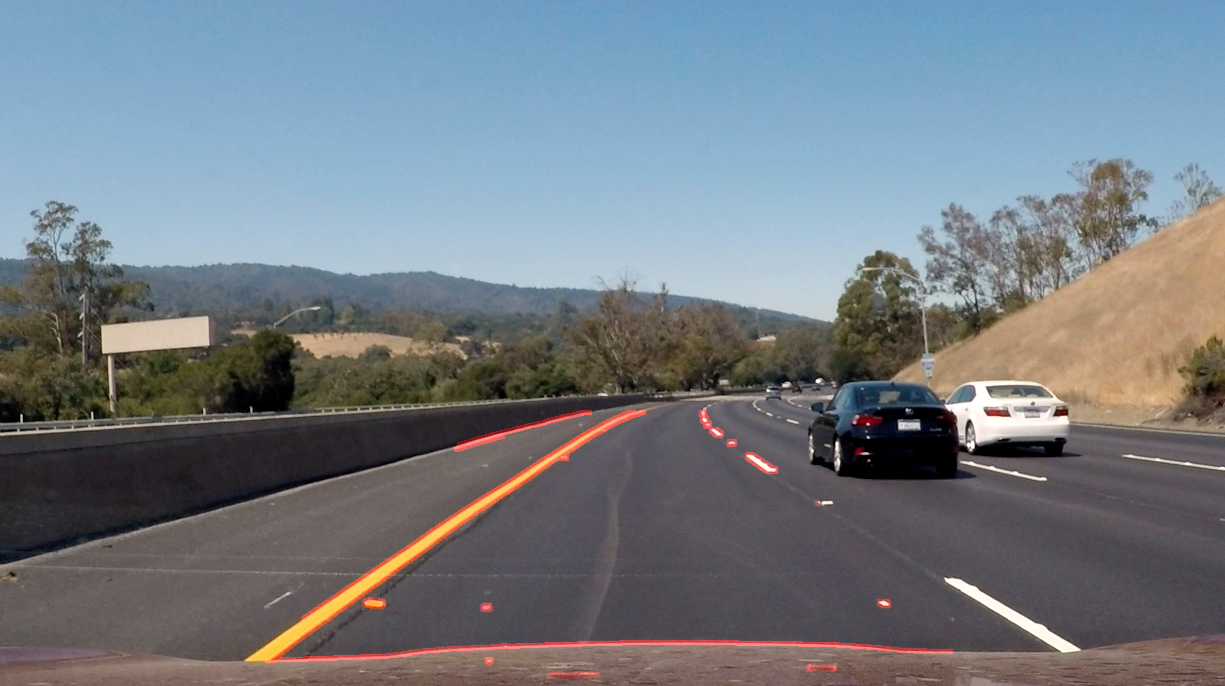

Time taken: 0.21707606315612793 seconds
Processing: /content/drive/My Drive/CS543/Project/test_images/challenge-area.png


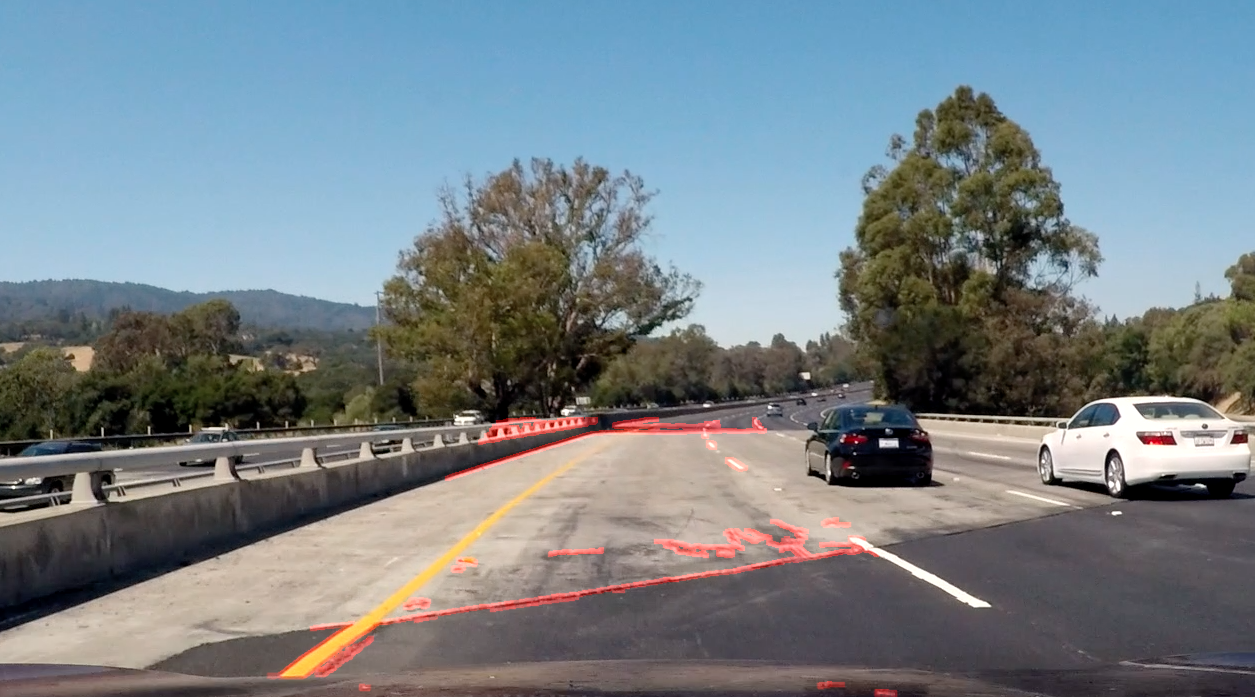

Time taken: 0.3303561210632324 seconds


In [ ]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

image_folder = '/content/drive/My Drive/CS543/Project/test_images'
image_paths = glob.glob(f'{image_folder}/*.png')

for image_path in image_paths:
    start_time = time.time()
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)

    height, width = edges.shape
    polygon = np.array([[
        (width * 0.2, height),
        (width * 0.4, height * 0.6),
        (width * 0.6, height * 0.6),
        (width * 0.8, height),
    ]], dtype=np.int32)
    mask = np.zeros_like(edges)
    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(edges, mask)

    src_points = np.float32([
        [width * 0.4, height * 0.6],
        [width * 0.6, height * 0.6],
        [width * 0.2, height],
        [width * 0.8, height]
    ])
    dst_points = np.float32([
        [width * 0.2, 0],
        [width * 0.8, 0],
        [width * 0.2, height],
        [width * 0.8, height]
    ])
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    warped = cv2.warpPerspective(roi, M, (width, height))

    Minv = cv2.getPerspectiveTransform(dst_points, src_points)
    lane_warped = cv2.warpPerspective(warped, Minv, (width, height))

    kernel = np.ones((5, 5), np.uint8)
    lane_thick = cv2.dilate(lane_warped, kernel, iterations=1)

    lane_red = np.zeros_like(image)
    lane_red[:, :, 2] = lane_thick

    final_result = cv2.addWeighted(image, 1, lane_red, 0.5, 0)

    print(f"Processing: {image_path}")
    cv2_imshow(final_result)
    end_time = time.time()
    print(f"Time taken: {end_time - start_time} seconds")

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import time

input_video_path = '/content/drive/My Drive/CS543/Project/Drive_01.mp4'
output_video_path = '/content/drive/My Drive/CS543/Project/01_output.mp4'

cap = cv2.VideoCapture(input_video_path)
start_time = time.time()
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)

    height, width = edges.shape
    polygon = np.array([[
        (width * 0.2, height),
        (width * 0.4, height * 0.6),
        (width * 0.6, height * 0.6),
        (width * 0.8, height),
    ]], dtype=np.int32)
    mask = np.zeros_like(edges)
    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(edges, mask)

    src_points = np.float32([
        [width * 0.4, height * 0.6],
        [width * 0.6, height * 0.6],
        [width * 0.2, height],
        [width * 0.8, height]
    ])
    dst_points = np.float32([
        [width * 0.2, 0],
        [width * 0.8, 0],
        [width * 0.2, height],
        [width * 0.8, height]
    ])
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    warped = cv2.warpPerspective(roi, M, (width, height))

    Minv = cv2.getPerspectiveTransform(dst_points, src_points)
    lane_warped = cv2.warpPerspective(warped, Minv, (width, height))

    kernel = np.ones((5, 5), np.uint8)
    lane_thick = cv2.dilate(lane_warped, kernel, iterations=1)

    lane_red = np.zeros_like(frame)
    lane_red[:, :, 2] = lane_thick

    final_result = cv2.addWeighted(frame, 1, lane_red, 0.5, 0)

    out.write(final_result)

    cv2_imshow(final_result)

end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")
cap.release()
out.release()
cv2.destroyAllWindows()
